In [ ]:
import pandas as pd

In [ ]:
from pandas import Series, DataFrame

In [ ]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

La librairie pandas contient des structures et des outils de manipulation de données conçus pour rendre le nettoyage et l’analyse des données rapides et faciles à effectuer en Python. pandas est souvent utilisé en tandem avec des outils de calcul numérique comme NumPy et SciPy, des librairies analytiques comme statsmodels et scikit-learn, et des librairies de visualisation de données comme matplotlib.  
pandas propose une approche dans le même style que NumPy pour le calcul basé sur les tableaux, avec en particulier des fonctions de traitement de tableaux ainsi qu’une préférence pour traiter les données sans requérir de boucles de répétition for. Pandas adopte de nombreux idiomes de codage de NumPy, la plus grande différence est que pandas est conçu pour travailler avec des données tabulaires ou hétérogènes. NumPy, en revanche, est plus adapté pour travailler avec des tableaux de données numériques homogènes.

# Introduction aux structures de données pandas  

Pour commencer à travailler avec pandas, vous devez vous familiariser avec ses deux structures de données de base : Series et DataFrame. Bien qu’elles ne constituent pas une solution universelle pour tous les problèmes, elles fournissent une base solide et facile d’emploi pour la plupart des applications.

## Series  

Un objet Series est un objet unidimensionnel de type tableau contenant une séquence de valeurs (de types similaires à ceux de NumPy) et un tableau associé d’étiquettes de données, appelé son index. La série la plus simple est formée à partir d’un unique tableau de données :



In [ ]:
import pandas as pd

In [ ]:
[1,2,3]

[1, 2, 3]

In [ ]:
import numpy as np
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

La représentation des chaînes d’une série affichée de manière interactive montre l’index à gauche et les valeurs à droite. Comme nous n’avons pas spécifié d’index pour les données, un index par défaut composé des entiers de 0 à N – 1 (où N est la longueur des données) est créé. Vous pouvez obtenir la représentation du tableau et de l’index de l’objet Series via ses valeurs et ses attributs d’index, respectivement :

In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Souvent, il sera souhaitable de créer une série avec un index identifiant chaque point de données par une étiquette :

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.values

array([ 4,  7, -5,  3])

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Par comparaison avec les tableaux NumPy, vous pouvez utiliser des étiquettes dans l’index lorsque vous sélectionnez des valeurs individuelles ou un ensemble de valeurs :

In [ ]:
obj2['a']

-5

In [ ]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

Ici, ['c', 'a', 'd'] est interprété comme une liste d’indices, même si elle contient des chaînes de caractères au lieu d’entiers.  
  
L’utilisation de fonctions NumPy ou d’opérations similaires à celles de NumPy, telles que le filtrage avec un tableau booléen, la multiplication scalaire ou l’application de fonctions mathématiques, permettra de préserver le lien entre l’index et la valeur :

In [ ]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [ ]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [ ]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Si des données sont contenues dans un dict Python, vous pouvez créer un objet Series à partir de celui-ci en passant le dict :

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Vous pouvez passer les clés du dict dans l’ordre dans lequel vous voulez qu’elles apparaissent dans la série résultante :

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Ici, trois valeurs trouvées dans sdata ont été placées aux endroits voulus, mais comme aucune valeur pour 'California' n’a été trouvée, elle apparaît sous la forme NaN (not a number, pas un nombre), ce qui est considéré dans pandas comme marquant une valeur manquante ou non définie (NA). Comme 'Utah' n’a pas été inclus dans la liste states, il est exclu de l’objet résultant. J’emploierai les termes manquant ou NA de manière interchangeable pour désigner les données manquantes. Les fonctions isnull et notnull dans pandas peuvent être appliquées pour détecter les données manquantes :

In [ ]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series dispose également de ces fonctions en tant que méthodes d’instance :

In [ ]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Une caractéristique utile de Series pour de nombreuses applications est l’alignement automatique par étiquette d’index dans les opérations arithmétiques :

In [ ]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

L’objet Series lui-même et son index ont un attribut name:

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

L’index d’une série peut être modifié sur place via une affectation :

In [ ]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

In [ ]:
obj['Bob']

4

# DataFrame  
Un DataFrame représente un tableau rectangulaire de données, et contient une collection ordonnée de colonnes, chacune pouvant être d’un type différent (numérique, chaîne de caractères, booléen, etc.). Un DataFrame possède un index des lignes ainsi que des colonnes. On peut le considérer comme un dict de Series partageant le même index.

Il existe de nombreuses façons de construire un DataFrame, bien que l’une des plus courantes consiste à partir d’un dict de listes de longueur égale ou de tableaux NumPy :

In [ ]:
amazon = pd.read_csv('https://raw.githubusercontent.com/EMSIMa/ADD3IIR/main/Projet/Datasets/amazon.csv')
amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [ ]:
amazon.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, '2003'],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

L’index du DataFrame résultant sera attribué automatiquement, comme pour les Series, et les colonnes sont placées dans un ordre trié :

In [ ]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Pour les grands DataFrame, la méthode head ne sélectionne que les cinq premières lignes :

In [ ]:
frame.head(2)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7


Si vous spécifiez une séquence de colonnes, les colonnes du DataFrame seront disposées dans l’ordre indiqué :

In [ ]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Si vous passez une colonne qui n’est pas contenue dans le dict, elle apparaîtra avec des valeurs manquantes dans le résultat :

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       ['2003', 'Nevada', 3.2, nan]], dtype=object)

Une colonne dans un DataFrame peut être récupérée sous forme d’un objet Series, soit par une notation de type dict, soit par attribut :

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: object

Notez que les séries renvoyées ont le même index que le DataFrame, et que leur attribut de nom a été défini de manière appropriée. Les lignes peuvent également être récupérées par position ou par nom avec l’attribut spécial loc (nous y reviendrons plus loin) :

Les colonnes peuvent être modifiées par affectation. Par exemple, la colonne vide 'debt' peut se voir attribuer une valeur scalaire ou un tableau de valeurs :

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [ ]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Lorsque vous affectez des listes ou des tableaux à une colonne, la longueur de la valeur doit correspondre à la longueur du DataFrame. Si vous attribuez une série, ses étiquettes seront alignées exactement sur l’index du DataFrame, en insérant les valeurs manquantes dans les trous :

In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Affecter une colonne qui n’existe pas crée une nouvelle colonne. Le mot clé `del` supprimera les colonnes comme pour un dict. Comme exemple pour del, j’ajoute d’abord une nouvelle colonne de valeurs booléennes où la colonne state est égale à 'Ohio' :

In [ ]:
frame2['state'] == 'Ohio'

one       True
two       True
three     True
four     False
five     False
six      False
Name: state, dtype: bool

In [ ]:
frame2['eastern'] = frame2['state'] == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


La méthode `del` peut alors être utilisée pour supprimer cette colonne :

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'eastern'], dtype='object')

In [ ]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Une autre forme courante de données est un dict imbriqué de plusieurs autres dict :

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

Si le dict emboîté est passé au DataFrame, pandas interprétera les clés du dict extérieur comme étant les colonnes, et les clés intérieures comme étant les indices des lignes :

In [ ]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Vous pouvez transposer les DataFrame (échanger les lignes et les colonnes) avec une syntaxe similaire à un tableau NumPy :

In [ ]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


Les clés des dictionnaires intérieurs sont combinées et triées pour former l’index du résultat. Cela n’est pas vrai si un index explicite est spécifié :

In [ ]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Si les éléments index et columns d’un DataFrame ont leurs attributs name définis, ceux-ci seront également affichés :

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Comme pour les objets Series, l’attribut values renvoie les données contenues dans le DataFrame sous forme d’un tableau bidimensionnel :

# Objets Index   

Les objets Index de pandas sont chargés de contenir les étiquettes des axes et d’autres métadonnées (comme le ou les noms des axes). Tout tableau ou toute autre séquence d’étiquettes que vous utilisez lors de la construction d’un objet Series ou DataFrame est converti en interne en un index :

In [ ]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
obj

a    0
b    1
c    2
dtype: int64

In [ ]:
obj.index = ['a','d','c']
obj

a    0
d    1
c    2
dtype: int64

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

Les objets Index sont immutables et ne peuvent donc pas être modifiés par l’utilisateur :

In [ ]:
index[1] = 'd'

TypeError: Index does not support mutable operations

In [ ]:
obj

a    0
d    1
c    2
dtype: int64

In [ ]:
obj.index = ['a','d','c']
obj

a    0
d    1
c    2
dtype: int64

L’immutabilité rend plus sûr le partage des objets Index entre les structures de données :

un Index pandas peut contenir des étiquettes dupliquées :

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Les sélections avec des étiquettes en double renverront toutes les occurrences de cette étiquette.  
  
Chaque Index possède un certain nombre de méthodes et de propriétés pour la logique ensembliste, qui répondent à d’autres questions courantes sur les données qu’il contient.

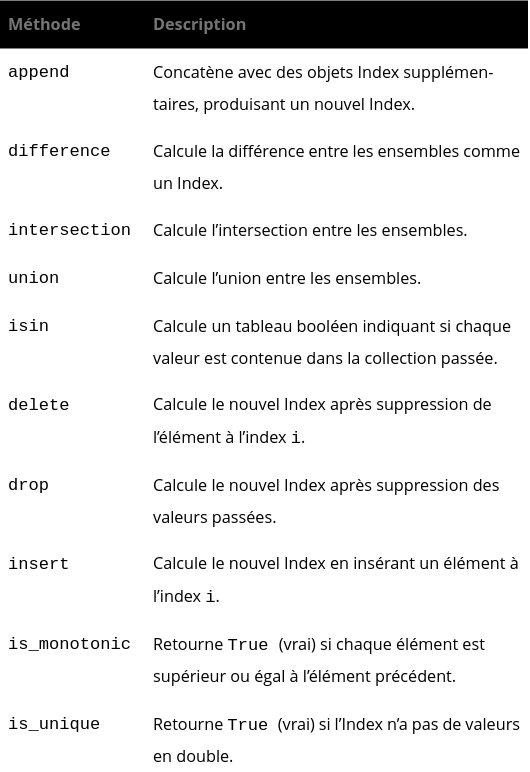

# Réindexation  
  
Une méthode importante pour les objets pandas est reindex, qui consiste à créer un nouvel objet dont les données se conforment à un nouvel index. Prenons un exemple :

In [ ]:
obj

a    0
d    1
c    2
dtype: int64

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

L’appel à reindex sur cette série réorganise les données en fonction du nouvel index, en introduisant des valeurs manquantes si aucune valeur d’index n’était déjà présente :

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [ ]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Pour les données ordonnées, comme les séries chronologiques, il peut être souhaitable de faire une certaine interpolation ou de remplir des valeurs lors de la réindexation. L’option method nous permet de le faire, en spécifiant une méthode telle que ffill, qui préremplit les valeurs :

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [ ]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

Avec un DataFrame, reindex peut modifier soit l’index (ligne), soit les colonnes, ou les deux. Si seule une séquence est passée, elle réindexe les lignes du résultat :

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [ ]:
frame2 = frame.reindex(index = ['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


Les colonnes peuvent être réindexées avec le mot clé columns :

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### Supprimer des entrées d’un axe   
Il est facile de supprimer une ou plusieurs entrées d’un axe si vous disposez déjà d’un tableau d’index ou d’une liste sans ces entrées. Cela peut nécessiter un peu de manipulation de données et de logique ensembliste ; la méthode drop peut renvoyer un nouvel objet avec la ou les valeurs indiquées supprimées d’un axe :

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop('c')

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

Avec un DataFrame, les valeurs d’index peuvent être supprimées de l’un ou de l’autre axe. Pour illustrer ceci, commençons par créer un exemple de DataFrame :

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


L’appel à drop avec une séquence d’étiquettes supprimera les valeurs depuis les étiquettes des lignes (axe 0) :

In [ ]:
data.drop('two',axis = 'columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Vous pouvez supprimer des valeurs à partir des colonnes en passant l’un des arguments axis=1 ou axis='columns' :

In [ ]:
data.drop('two', axis='columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


De nombreuses fonctions, comme drop, qui modifient la taille ou la forme d’un élément Series ou DataFrame, peuvent manipuler un objet en place sans retourner un nouvel objet :

Faites attention à l’emploi de inplace, car il détruit toutes les données qui sont supprimées.

# Indexation, sélection et filtrage  
L’indexation Series (obj[...]) fonctionne de manière analogue à l’indexation des tableaux NumPy, sauf que vous pouvez utiliser les valeurs d’index des objets Series au lieu des seuls entiers. En voici quelques exemples :

In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [ ]:
obj['b']

1.0

In [ ]:
obj[1]

1.0

In [ ]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [ ]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [ ]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [ ]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

Le tranchage avec étiquettes se comporte différemment du tranchage normal de Python, en ce sens que la borne de fin est inclusive, comme dans :

In [ ]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

Effectuer une affectation à l’aide de ces méthodes modifie la section correspondante de l’objet Series :

In [ ]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

L’indexation dans un DataFrame permet de récupérer une ou plusieurs colonnes avec une seule valeur ou séquence :

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data[0:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
data[['two','four']]

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [ ]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [ ]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [ ]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


La syntaxe de sélection des lignes data[ : 2] est fournie à titre de commodité. Le fait de passer un élément unique ou une liste à l’opérateur [] sélectionne des colonnes.

Dans ce cas particulier, la syntaxe de DataFrame ressemble davantage à celle d’un tableau NumPy bidimensionnel.

# Sélection avec loc et iloc  
Pour l’indexation par étiquettes des DataFrame sur les lignes, les opérateurs d’indexation spéciaux loc et iloc permettent de sélectionner un sous-ensemble de lignes et de colonnes d’un DataFrame avec une notation de type NumPy en utilisant soit des étiquettes d’axes (loc), soit des entiers (iloc).

À titre d’exemple préliminaire, sélectionnons une seule ligne et plusieurs colonnes par étiquette :

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.loc['Ohio':'Utah',['three','one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8


In [ ]:
data.iloc[0:3,[2,0]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8


Effectuons ensuite quelques sélections similaires avec des entiers en utilisant iloc :

In [ ]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [ ]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [ ]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


Les deux fonctions d’indexation travaillent avec des tranches en plus d’étiquettes individuelles ou de listes d’étiquettes :

In [ ]:
data.loc[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int64

In [ ]:
data.three > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [ ]:
data.iloc[:, :3]

,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [ ]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


# Application de fonctions et mappage  
  
Les ufuncs de NumPy (méthodes de tableaux élément par élément) fonctionnent également avec les objets pandas :

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.274992,0.228913,1.352917
Ohio,0.886429,-2.001637,-0.371843
Texas,1.669025,-0.438570,-0.539741
Oregon,0.476985,3.248944,-1.021228


Une autre opération fréquente consiste à appliquer une fonction sur des tableaux unidimensionnels à chaque colonne ou ligne. C’est exactement ce que réalise la méthode apply du DataFrame :

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.394034
d    5.250581
e    2.374144
dtype: float64

Ici, la fonction f, qui calcule la différence entre le maximum et le minimum d’une série, est invoquée une fois sur chaque colonne dans frame. Le résultat est une série ayant les colonnes de frame comme index.

Si vous passez axis='columns' à apply, la fonction sera invoquée à la place une fois par ligne :

In [ ]:
frame.apply(lambda x: x.max() - x.min(), axis='columns')

Utah      1.124004
Ohio      2.888067
Texas     2.208767
Oregon    4.270171
dtype: float64

La plupart des statistiques de tableau les plus courantes (comme la somme et la moyenne) sont des méthodes de DataFrame, et il n’est donc pas nécessaire d’utiliser apply.  
  
La fonction passée à apply n’a pas besoin de renvoyer une valeur scalaire. Elle peut aussi renvoyer un objet Series avec des valeurs multiples :

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.548914,-0.386580,-1.505185
max,1.014018,0.904819,0.549241


Des fonctions Python travaillant élément par élément peuvent également être utilisées. Supposons que vous vouliez formater chaque valeur en virgule flottante avec 2 elements apres la virgule. Vous pouvez le faire avec applymap :

In [ ]:
for i in range(5):
    print(f'la valeure de i est: {i}')

la valeure de i est: 0
la valeure de i est: 1
la valeure de i est: 2
la valeure de i est: 3
la valeure de i est: 4


In [ ]:
format = lambda x: f'{x:.2f}'
frame.applymap(format)

,b,d,e
Utah,0.27,0.23,1.35
Ohio,0.89,-2.00,-0.37
Texas,1.67,-0.44,-0.54
Oregon,0.48,3.25,-1.02


Le nom applymap vient du fait que Series dispose d’une méthode map pour appliquer une fonction élément par élément :

In [ ]:
frame['e'].map(format)

# Tri
  
Le tri d’un jeu de données en fonction de certains critères est une autre opération native importante. Pour effectuer un tri lexicographique par index de ligne ou de colonne, utilisez la méthode sort_index, qui renvoie un nouvel objet trié :

In [ ]:
obj = pd.Series([5,6,2,1], index=['d', 'a', 'b', 'c'])
obj

d    5
a    6
b    2
c    1
dtype: int64

In [ ]:
obj.sort_index()

a    6
b    2
c    1
d    5
dtype: int64

In [ ]:
obj.sort_values()

c    1
b    2
d    5
a    6
dtype: int64

Avec un DataFrame, vous pouvez trier par index sur l’un ou l’autre des axes :

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis='columns')

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Par défaut, les données sont triées par ordre croissant, mais elles peuvent également être triées par ordre décroissant :

In [ ]:
frame.sort_index(axis=1, ascending=False)

Pour trier une série en fonction de ses valeurs, utilisez sa méthode sort_values :

Lorsque vous triez un DataFrame, vous pouvez utiliser les données d’une ou de plusieurs colonnes comme clés de tri. Pour cela, passez un ou plusieurs noms de colonnes à l’option by de sort_values :

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [ ]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


Pour trier sur plusieurs colonnes, passez une liste de noms :

In [ ]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1
